In [1]:
#指导教师：宋陆军教师
#参考资料：基于python的金融分析与风险管理-斯文
#          风险管理与金融机构赫尔

In [2]:
import numpy as  np #导入numpy模块
import pandas as pd #导入pandas模块
import scipy #导入scipy 统计模块
import matplotlib.pyplot as plt #导入pyplot模块
from pylab import mpl #导入mpl模块
# mpl.rcParams["font.sans-serif"] = ["simehei"]
# mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [3]:
data = pd.read_excel("D:\\BaiduNetdiskWorkspace\\source\\xs数据\\投资组合配置的资产情况.xlsx",sheet_name = "Sheet1", header=0,index_col=0)

In [4]:
#收益率
R = np.log(data/data.shift(1))

In [5]:
R = R.dropna()

In [6]:
Value_port = 10000
weights = np.array([0.15,0.20,0.50,0.05,0.10])

In [7]:
Vaule_asset = Value_port*weights

In [8]:
Vaule_asset

array([1500., 2000., 5000.,  500., 1000.])

In [9]:
R.head()

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
日期,,,,,
2015-01-06,-0.023431,-0.021506,0.001866,-0.008710,-0.008965
2015-01-07,-0.025029,-0.020499,0.000932,0.009531,0.011994
2015-01-08,-0.006135,-0.034616,0.000000,0.007089,0.018250
2015-01-09,-0.007590,-0.004605,0.000931,0.002984,-0.008775
2015-01-12,-0.020598,-0.003082,-0.001862,0.003155,-0.009297


In [10]:
Return_history = np.dot(R,Vaule_asset)

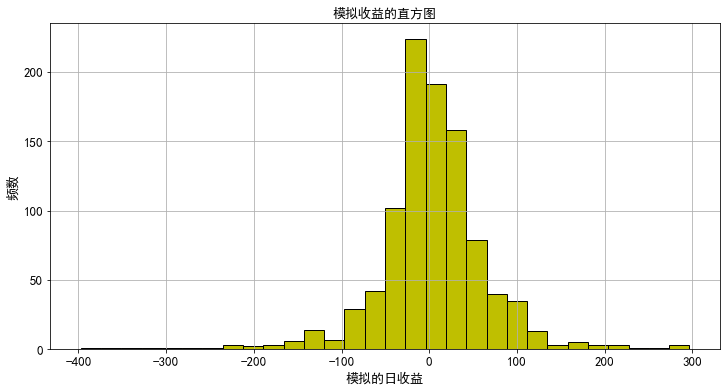

In [11]:
plt.figure(figsize=(12,6))
plt.hist(Return_history,bins = 30,facecolor = "y",edgecolor="k" )
plt.xlabel(u'模拟的日收益',fontsize =13)
plt.ylabel(u'频数',fontsize =13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'模拟收益的直方图',fontsize =13)
plt.grid("True")
plt.show()

In [12]:
VaR99_1day_history = np.abs(np.percentile(a = Return_history,q = 1))## q = 1 放大100倍

In [13]:
VaR99_1day_history

213.57309545151483

In [14]:
VaR95_1day_history = np.abs(np.percentile(a = Return_history,q = 5))

In [15]:
VaR95_1day_history

86.71433366165734

In [16]:
VaR99_10day_history = np.abs(np.percentile(a = Return_history,q = 1))*np.sqrt(10)

In [17]:
VaR99_10day_history 

675.3774285593342

In [18]:
##蒙特卡洛模拟法

In [19]:
import numpy.random as npr

In [20]:
I = 100000
epsilon = npr.standard_t(df=len(R),size = I)
gzmt = data.iloc[-1,0]
jtyh = data.iloc[-1,1]
zqjj = data.iloc[-1,2]
hsjj = data.iloc[-1,3]
bp500 = data.iloc[-1,4]

In [21]:
R_mean = R.mean()*252

In [22]:
R_vol = R.std()*np.sqrt(252)

In [23]:
dt =1/252

In [24]:
gzmt_new = gzmt*np.exp((R_mean[0]-0.5*R_vol[0]**2)*dt+R_vol[0]*epsilon*np.sqrt(dt))

In [25]:
gzmt_new

array([591.13050201, 587.72439316, 596.84832107, ..., 585.46817175,
       613.24548461, 591.12271556])

In [26]:
len(gzmt_new)

100000

In [27]:
jtyh_new = jtyh*np.exp((R_mean[1]-0.5*R_vol[1]**2)*dt+R_vol[1]*epsilon*np.sqrt(dt))
zqjj_new  = zqjj*np.exp((R_mean[2]-0.5*R_vol[2]**2)*dt+R_vol[2]*epsilon*np.sqrt(dt))
hsjj_new = hsjj*np.exp((R_mean[3]-0.5*R_vol[3]**2)*dt+R_vol[3]*epsilon*np.sqrt(dt))
bp500_new = bp500*np.exp((R_mean[4]-0.5*R_vol[4]**2)*dt+R_vol[4]*epsilon*np.sqrt(dt))

In [28]:
gzmt_new_port = (gzmt_new/gzmt-1)*1500
jtyh_new_port = (jtyh_new/jtyh-1)*2000
zqjj_new_port = (zqjj_new/zqjj-1)*5000
hsjj_new_port = (hsjj_new/hsjj-1)*500
bp500_new_port = (bp500_new/bp500-1)*1000

In [29]:
Sp_new_port = gzmt_new_port+jtyh_new_port+zqjj_new_port+hsjj_new_port+bp500_new_port

In [30]:
Sp_new_port

array([  6.28594899, -18.41651037,  47.69231121, ..., -34.79475055,
       166.01623635,   6.22950994])

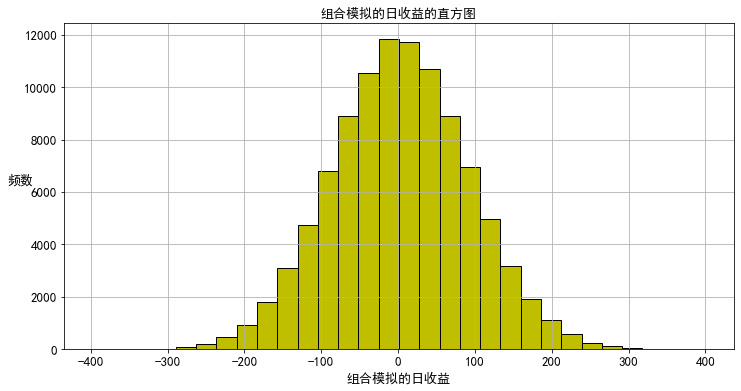

In [31]:
plt.figure(figsize=(12,6))
plt.hist(Sp_new_port,bins = 30,facecolor = "y",edgecolor="k" )
plt.xlabel(u'组合模拟的日收益',fontsize =13)
plt.ylabel(u'频数',fontsize =13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'组合模拟的日收益的直方图',fontsize =13)
plt.grid("True")
plt.show()

In [32]:
VaR99_1day_Mt= np.abs(np.percentile(a = Sp_new_port,q = 1))

In [33]:
VaR99_1day_Mt

202.91979668036586

In [34]:
VaR95_1day_Mt= np.abs(np.percentile(a = Sp_new_port,q = 5))

In [35]:
VaR95_1day_Mt

143.37667853682206

In [36]:
VaR99_10day_Mt= np.abs(np.percentile(a = Sp_new_port,q = 1))*np.sqrt(10)

In [37]:
VaR99_10day_Mt

641.6887398482306